# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


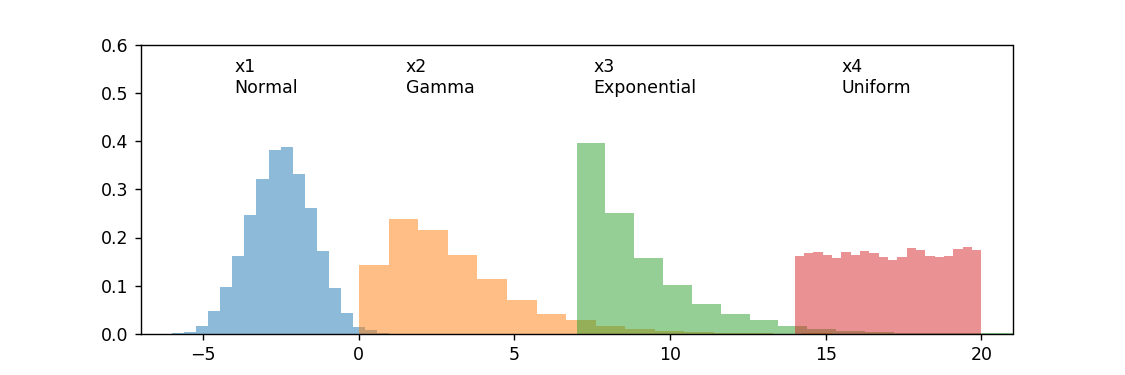

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


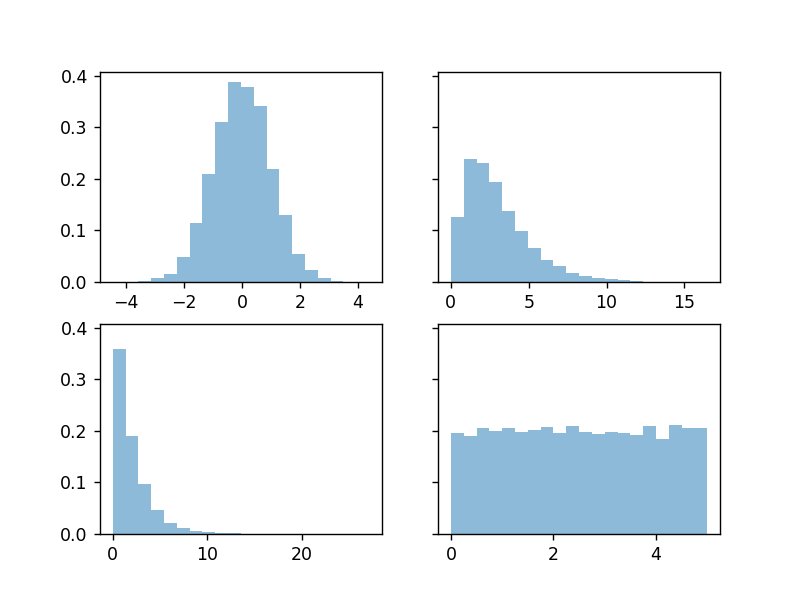

(array([ 0.19605252,  0.1892507 ,  0.20565509,  0.2004537 ,  0.2060552 ,
         0.19765295,  0.20245424,  0.20645531,  0.19605252,  0.20925606,
         0.19725284,  0.19405198,  0.19765295,  0.19645263,  0.19125123,
         0.20965616,  0.18444941,  0.21125659,  0.20485488,  0.20485488]),
 array([  1.85363728e-04,   2.50118392e-01,   5.00051420e-01,
          7.49984448e-01,   9.99917476e-01,   1.24985050e+00,
          1.49978353e+00,   1.74971656e+00,   1.99964959e+00,
          2.24958262e+00,   2.49951564e+00,   2.74944867e+00,
          2.99938170e+00,   3.24931473e+00,   3.49924776e+00,
          3.74918078e+00,   3.99911381e+00,   4.24904684e+00,
          4.49897987e+00,   4.74891290e+00,   4.99884592e+00]),
 <a list of 20 Patch objects>)

In [6]:
# # Test Code
# import matplotlib.animation as animation
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.gridspec as gridspec

# x1 = np.random.normal(0, 1, 10000)
# x2 = np.random.gamma(2, 1.5, 10000)
# x3 = np.random.exponential(2, 10000)
# x4 = np.random.uniform(0,5, 10000)

# gspec = gridspec.GridSpec(2, 2)
# # plt.figure()
# # ax1 = plt.subplot(gspec[0:4, 0:4])
# # ax2 = plt.subplot(gspec[0:4, 6:])
# # ax3 = plt.subplot(gspec[6:, 0:4])
# # ax4 = plt.subplot(gspec[6:, 6:])
# fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2, 2, sharey = True)
# axs = [ax1, ax2, ax3, ax4] 


# ax1.hist(x1, normed=True, bins=20, alpha=0.5)
# ax2.hist(x2, normed=True, bins=20, alpha=0.5)
# ax3.hist(x3, normed=True, bins=20, alpha=0.5)
# ax4.hist(x4, normed=True, bins=20, alpha=0.5)

# # change axes limits
# #for ax in axs:
#  #   ax.set_ylim(0, 0.5)



In [36]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

%matplotlib notebook

x0 = np.random.normal(0, 1, 10000)
x1 = np.random.gamma(2, 1.5, 10000)
x2 = np.random.exponential(2, 10000)
x3 = np.random.uniform(0,5, 10000)

axis0 = [-5, 5, 0, 0.6]
axis1 = [0, 15, 0, 0.6]
axis2 = [-1, 15, 0, 0.6]
axis3 = [0, 5, 0, 0.6]
axis = [axis0, axis1, axis2, axis3]


<IPython.core.display.Javascript object>


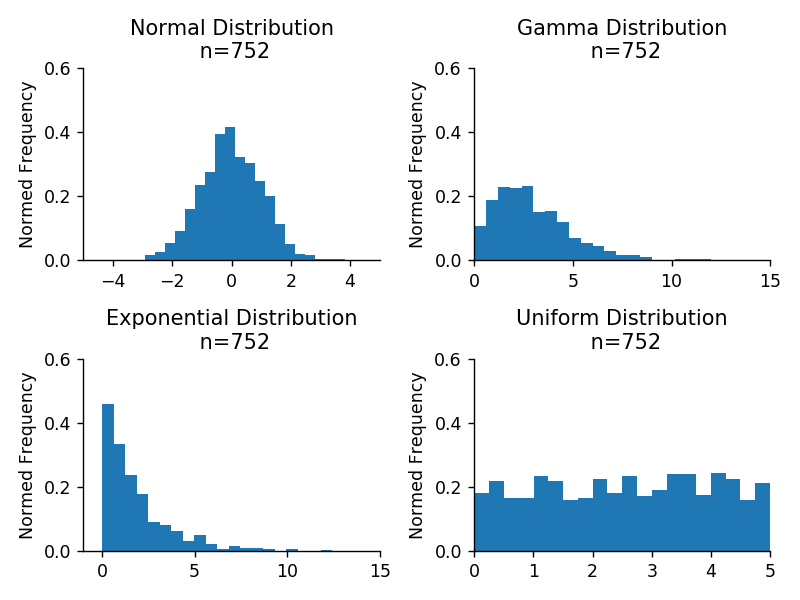

In [58]:
# Creating the plot
# gspec = gridspec.GridSpec(4, 4)
# plt.figure()
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2, 2, sharey = True)
ax = [ax1, ax2, ax3, ax4]
for a in ax:
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
gspec.update(wspace = .6, hspace = .6)

def update(curr):
    if curr == 100:
        a.event_source.stop()
    for i in range(len(ax)):
        ax[i].cla()
#         ax[i].hist(x[i][:curr], normed = True, bins = 20)
#         ax[i].axis(axis[i])
        ax[i].set_ylabel('Normed Frequency')
        if i == 0:
            ax[i].hist(x0[:curr], normed = True, bins = 20)
            ax[i].axis(axis0)
            ax[i].set_title('Normal Distribution\n n={}'.format(curr))
        elif i == 1:
            ax[i].hist(x1[:curr], normed = True, bins = 20)
            ax[i].axis(axis1)           
            ax[i].set_title('Gamma Distribution\n n={}'.format(curr))
        elif i == 2:
            ax[i].hist(x2[:curr], normed = True, bins = 20)
            ax[i].axis(axis2)
            ax[i].set_title('Exponential Distribution\n n={}'.format(curr))
        else:
            ax[i].hist(x3[:curr], normed = True, bins = 20)
            ax[i].axis(axis3)
            ax[i].set_title('Uniform Distribution\n n={}'.format(curr))            
    plt.tight_layout()

fig = plt.gcf()
b = animation.FuncAnimation(fig, update, interval=100)


In [59]:
# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=60)
b.save('DistributionPlot.mp4', writer=writervideo)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6198: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
